# Buzzfeed / Wins LGBTQ in America Exploratory Data Analysis
Brittany Bennett | June 2019



In [1]:
# import necessary packages
import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dfpvizpy.dfpvizpy import dfpSave
import plotly
import plotly.plotly as py
import re
import plotly.io as pio
margin_of_error = 3.3

In [2]:
# read in the .sav file
df, meta = pyreadstat.read_sav("WINS LGBTQ in America Survey - Final_SPSS_060818.sav")


In [3]:
# let's take a look at what we're working with
df.head()

,responseid,respid,status,interview_start,interview_end,surveystatus,pid,psid,loi,qs1,...,qd16,qd17,weight1,VARA8F4010F18414AF49050,VARA8F4012BFF89411488FD,VARA8F4012CE77E42AA88A9,VARA8F4013021324B0A8635,VARA8F4013E88DB4C70B25A,VARA8F401404B0B4884B37B,VARA8F401418C1647C38D94
0,4.0,4.0,complete,2018-05-24,2018-05-24,1.0,1462008235,c-3eTjThveZo88GCLWW--Q**,1460.49,7.0,...,5.0,5.0,1.349406,2.0,1.0,1.0,4.0,3.0,1.0,3.0
1,7.0,7.0,complete,2018-05-24,2018-05-24,1.0,1453665890,c-3eTjThveawXOCmuOx-PQ**,759.78,8.0,...,5.0,4.0,1.175335,1.0,1.0,2.0,2.0,3.0,1.0,3.0
2,9.0,9.0,complete,2018-05-24,2018-05-24,1.0,1454242097,c-3eTjThveZxI5BkOsbbuA**,1546.62,8.0,...,5.0,6.0,0.880285,1.0,1.0,3.0,1.0,4.0,1.0,1.0
3,10.0,10.0,complete,2018-05-24,2018-05-24,1.0,1412734485,c-3eTjThveatmDPdiuBbRg**,1464.15,7.0,...,5.0,1.0,1.306463,2.0,1.0,1.0,2.0,NaN,2.0,1.0
4,11.0,11.0,complete,2018-05-24,2018-05-24,1.0,1458793597,c-3eTjThveZvKIihjUEdUg**,1110.68,8.0,...,4.0,3.0,1.044140,2.0,2.0,4.0,5.0,NaN,6.0,1.0


In [4]:
# create a key out of the meta data
key = pd.concat([pd.DataFrame(meta.column_labels), pd.DataFrame(meta.column_names)], axis = 1)
key.columns = ["question", "column"]
key.to_csv("key.csv")

## Fun With Pivot Tables
### Generic Function to Produce Pivot Tables

In [5]:
# input a survey question 
def survey_table(question):
    table = pd.pivot_table(df, values= ["qs8_1", "qs8_2", "qs8_3","qs8_4","qs8_5","qs8_6","qs8_7","qs8_8"],
                           columns=[question], aggfunc=sum)
    table.index = ["Transgender", "Gay", "Lesbian","Bisexual", "Queer", "Straight Cis", "Prefer not to answer", "N/A"]
    table["Total"] = table.sum(axis = 1, skipna = True)
    table = round((table.div( table.iloc[:,-1], axis=0 ) * 100),2)
    table.rename(columns=meta.variable_value_labels[question],inplace=True)
    return(table)

### Registered to Vote

In [6]:
registered = survey_table("q52")
registered


q52,Yes,No,Total
Transgender,78.43,21.57,100.0
Gay,94.38,5.62,100.0
Lesbian,91.67,8.33,100.0
Bisexual,83.00,17.00,100.0
Queer,78.08,21.92,100.0
Straight Cis,NaN,NaN,NaN
Prefer not to answer,NaN,NaN,NaN
N/A,NaN,NaN,NaN


### If you had to choose one, which of the following issues is most important to you in the November 2018 election for Congress and other offices?

In [7]:
midterms = survey_table("q54a")
midterms

q54a,Jobs and the Economy,Gun Reform,International Issues and National Security,Education,LGBTQ Issues,Abortion,Healthcare,Immigration,Climate Change and the Environment,Race Issues,Other (Specify),Total
Transgender,1.96,21.57,3.92,9.80,29.41,3.92,9.80,1.96,9.80,3.92,3.92,100.0
Gay,16.10,21.72,6.74,4.49,11.61,0.75,16.10,8.61,5.99,2.25,5.62,100.0
Lesbian,12.12,21.21,5.30,6.82,15.15,3.79,20.45,2.27,5.30,3.79,3.79,100.0
Bisexual,12.50,14.50,2.75,8.25,10.00,7.25,18.25,7.75,7.00,7.50,4.25,100.0
Queer,2.74,27.40,5.48,6.85,12.33,2.74,10.96,9.59,8.22,5.48,8.22,100.0
Straight Cis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prefer not to answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fun with Sankey Plots

In [8]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [9]:
# create a single column data frame to store identites of survey participants
identities = df.loc[:, ["qs8_1", "qs8_2", "qs8_3","qs8_4","qs8_5","qs8_6","qs8_7","qs8_8"]]
identities.columns = ["Transgender", "Gay", "Lesbian","Bisexual", "Queer", "Straight Cis", "Prefer not to answer", "N/A"]
identities = identities.loc[:,:].replace(1, pd.Series(identities.columns, identities.columns))
identities= identities.bfill(axis = 1).iloc[:, 0].to_frame()

### Registered to Vote and...

### Direction of Country

In [10]:
def get_sankey(question1, question2):
    question1_df = df.loc[:, question1]
    question2_df = df.loc[:,question2]
    result_df = pd.concat([question1_df, question2_df], axis = 1)
    column_1 = result_df.iloc[:,0].name
    column_2 = result_df.iloc[:,1].name
    result_df = result_df.groupby([column_1,column_2]).size().reset_index(name='frequency')
    result_df = result_df.replace({column_1: meta.variable_value_labels[column_1]})
    result_df = result_df.replace({column_2: meta.variable_value_labels[column_2]})
    column_1 = key.loc[key["column"] == question1].iloc[0]['question']
    column_2 = key.loc[key["column"] == question2].iloc[0]['question']
    result_df.columns = [column_1, column_2, "frequency"]

    return(result_df)

In [11]:
sankey = get_sankey("q52","q55")
column_1 = key.loc[key["column"] == "q52"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q55"].iloc[0]['question']
fig = genSankey(sankey,cat_cols=[column_1, column_2],value_cols="frequency",title='Registred voters and their opinion on the direction the country is going')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'registered_direction_of_country.png')


### Likely to Vote in the Midterms

In [12]:
vote = get_sankey("q52","q53")
column_1 = key.loc[key["column"] == "q52"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q53"].iloc[0]['question']
fig = genSankey(vote,cat_cols=[column_1, column_2],value_cols="frequency",title='Registred voters and their whether they intend to vote in the 2018 midterms')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'registered_chances_of_voting.png')


### Who to vote for

In [13]:
who = get_sankey("q52","q54")
column_1 = key.loc[key["column"] == "q52"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q54"].iloc[0]['question']
fig = genSankey(who,cat_cols=[column_1, column_2],value_cols="frequency",title='Registred voters and who they intend to vote for')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'registered_who_to_vote.png')


### Gun Laws

In [14]:
gun = get_sankey("q52","q59b")
column_1 = key.loc[key["column"] == "q52"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q59b"].iloc[0]['question']
fig = genSankey(gun,cat_cols=[column_1, column_2],value_cols="frequency",title='Registred voters and their stance on gun laws ')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'registered_gun_laws.png')


### How likely are a political candidate's positions on gun reform to impact your vote?

In [15]:
gun_position = get_sankey("q52","q59f_1")
column_1 = key.loc[key["column"] == "q52"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q59f_1"].iloc[0]['question']
fig = genSankey(gun_position,cat_cols=[column_1, column_2],value_cols="frequency",title='Registred voters and their stance on gun laws ')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'registered_impact_gun_stance.png')


### Registered to vote versus actually voted

In [16]:
gun_position = get_sankey("q52","qd7")
column_1 = key.loc[key["column"] == "q52"].iloc[0]['question']
column_2 = key.loc[key["column"] == "qd7"].iloc[0]['question']
fig = genSankey(gun_position,cat_cols=[column_1, column_2],value_cols="frequency",title='Registred voters and if they voted in 2016')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'registered_who_did_you_vote_for.png')


In [17]:
gun_position = get_sankey("qd7","q54")
column_1 = key.loc[key["column"] == "qd7"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q54"].iloc[0]['question']
fig = genSankey(gun_position,cat_cols=[column_1, column_2],value_cols="frequency",title='Who they voted for in 2016 and who they would vote for today')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'who_you_voted_for_who_vote_today.png')


### Race and who you will vote for

In [18]:
race = get_sankey("VARA8F4010F18414AF49050","q54")
column_1 = key.loc[key["column"] == "VARA8F4010F18414AF49050"].iloc[0]['question']
column_2 = key.loc[key["column"] == "q54"].iloc[0]['question']
fig = genSankey(race,cat_cols=[column_1, column_2],value_cols="frequency",title='Race and who they would vote for today')
plotly.offline.plot(fig, validate=False)
pio.write_image(fig, 'race_who_will_vote_for.png')


Plot of who people will vote for based on race 

In [19]:
# input a survey question 

def two_questions(question, index):
    table = pd.pivot_table(df, values= ["surveystatus"], index = index,
                           columns=[question], aggfunc=  sum)
    table["Total"] = table.sum(axis = 1, skipna = True)
    table = round((table.div( table.iloc[:,-1], axis=0 ) * 100),2)
    table.rename(meta.variable_value_labels[index],inplace= True, axis = 'index')
    table.rename(columns=meta.variable_value_labels[question],inplace=True)
    return(table)

def clean_df(df):
    df.columns = df.columns.get_level_values(1)
    df= df.reset_index()
    df= df.transpose()
    df.columns = df.iloc[0]
    df = df[1:]
    df= df.reset_index()
    df.columns = df.columns.get_level_values(0)
    df = df[:-1]

    return(df)

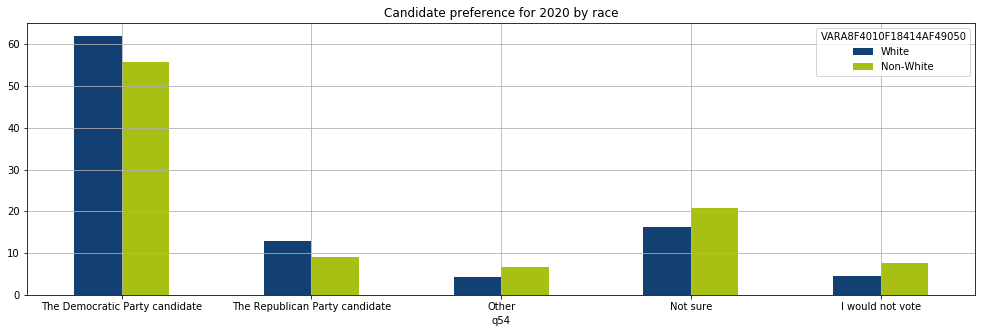

In [20]:
party_by_race = two_questions("q54", "VARA8F4010F18414AF49050")
party_by_race = clean_df(party_by_race)
fig = party_by_race.set_index('q54').plot.bar(figsize=(17,5), grid=True, rot = 0, title = "Candidate preference for 2020 by race").get_figure()
fig.savefig("candidate_preference_by_race.png")

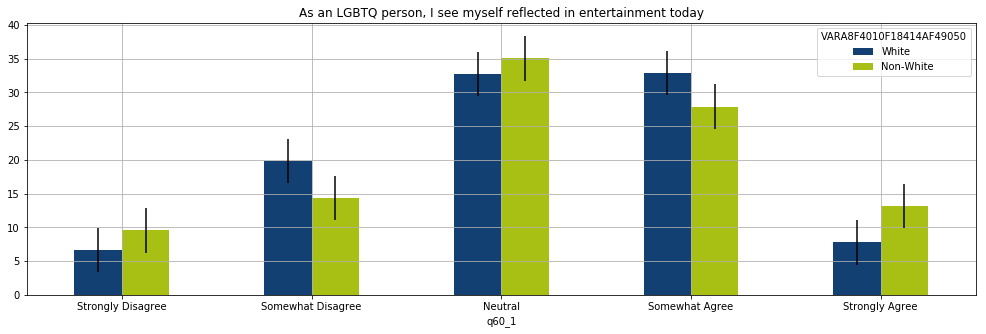

In [21]:
representation_by_race = two_questions("q60_1","VARA8F4010F18414AF49050")
representation_by_race = clean_df(representation_by_race)
fig = representation_by_race.set_index('q60_1').plot.bar(figsize=(17,5), grid=True, yerr = margin_of_error,
                                                   rot = 0, title = "As an LGBTQ person, I see myself reflected in entertainment today").get_figure()
fig.savefig("representation_by_race.png")

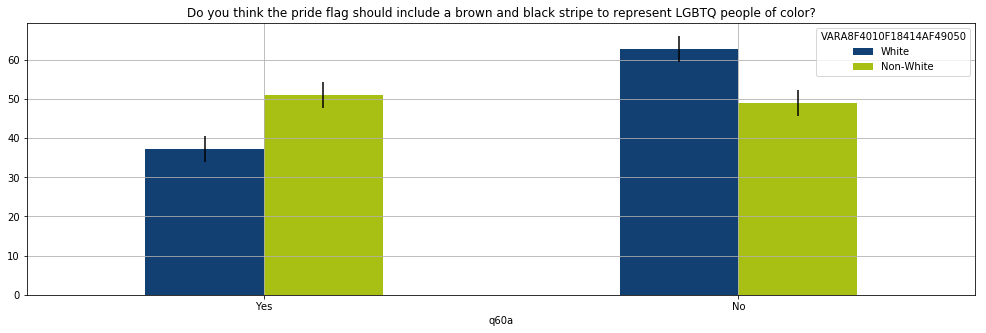

In [22]:
pride_flag = two_questions("q60a","VARA8F4010F18414AF49050")
pride_flag = clean_df(pride_flag)
fig = pride_flag.set_index('q60a').plot.bar(figsize=(17,5), grid=True, yerr = margin_of_error,
                                      rot = 0, title = "Do you think the pride flag should include a brown and black stripe to represent LGBTQ people of color?").get_figure()
fig.savefig("acceptance_by_race.png")

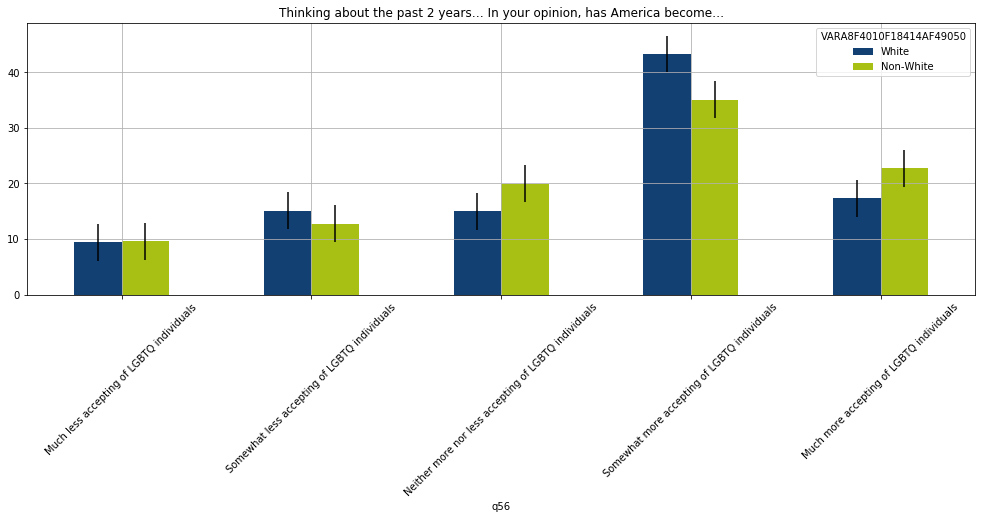

In [23]:
pride_flag = two_questions("q56","VARA8F4010F18414AF49050")
pride_flag = clean_df(pride_flag)
fig = pride_flag.set_index('q56').plot.bar(figsize=(17,5), grid=True, rot = 45, yerr = margin_of_error,
                                     title = "Thinking about the past 2 years… In your opinion, has America become…").get_figure()
fig.savefig("pride_flag.png")

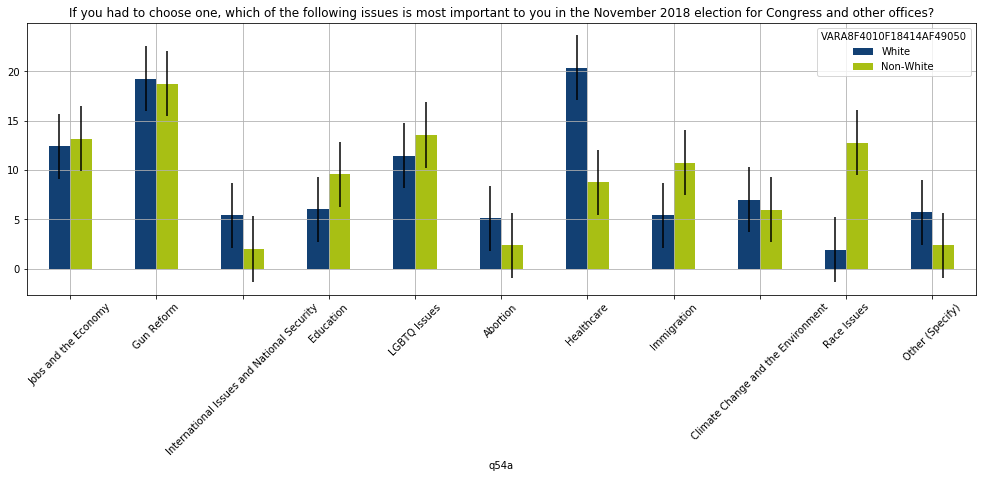

In [24]:
issue = two_questions("q54a","VARA8F4010F18414AF49050")
issue = clean_df(issue)
fig = issue.set_index('q54a').plot.bar(figsize=(17,5), yerr = margin_of_error,
                                 grid=True, rot = 45, title = "If you had to choose one, which of the following issues is most important to you in the November 2018 election for Congress and other offices?").get_figure()
fig.savefig("issue_by_race.png")


## Fun with sub plots

In [25]:

def make_subplot(question1, question2, row, column):
    plot_df = two_questions(question1, question2)
    plot_df = clean_df(plot_df)
    array_position = meta.column_names.index(question1)
    title = meta.column_labels[array_position]
    title = re.sub(r'.*-', '', title)
    plot_df.set_index(question1).plot.bar(grid=True, rot = 45,
                                ax=axes[row, column],
                                title = title,
                                yerr = margin_of_error)


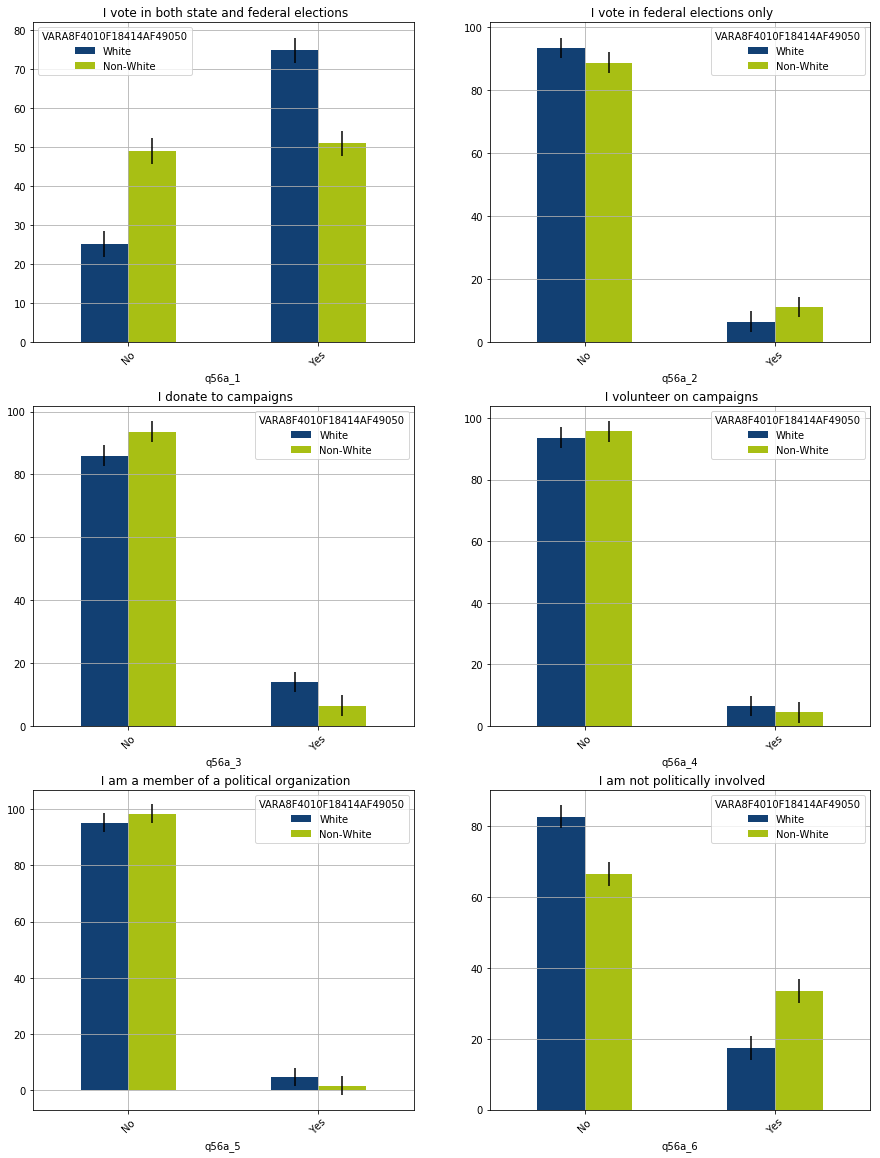

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,20))

make_subplot("q56a_1","VARA8F4010F18414AF49050", 0,0)
make_subplot("q56a_2","VARA8F4010F18414AF49050", 0,1)
make_subplot("q56a_3","VARA8F4010F18414AF49050", 1,0)
make_subplot("q56a_4","VARA8F4010F18414AF49050", 1,1)
make_subplot("q56a_5","VARA8F4010F18414AF49050", 2,0)
make_subplot("q56a_6","VARA8F4010F18414AF49050", 2,1)

fig.savefig("political_activity.png")

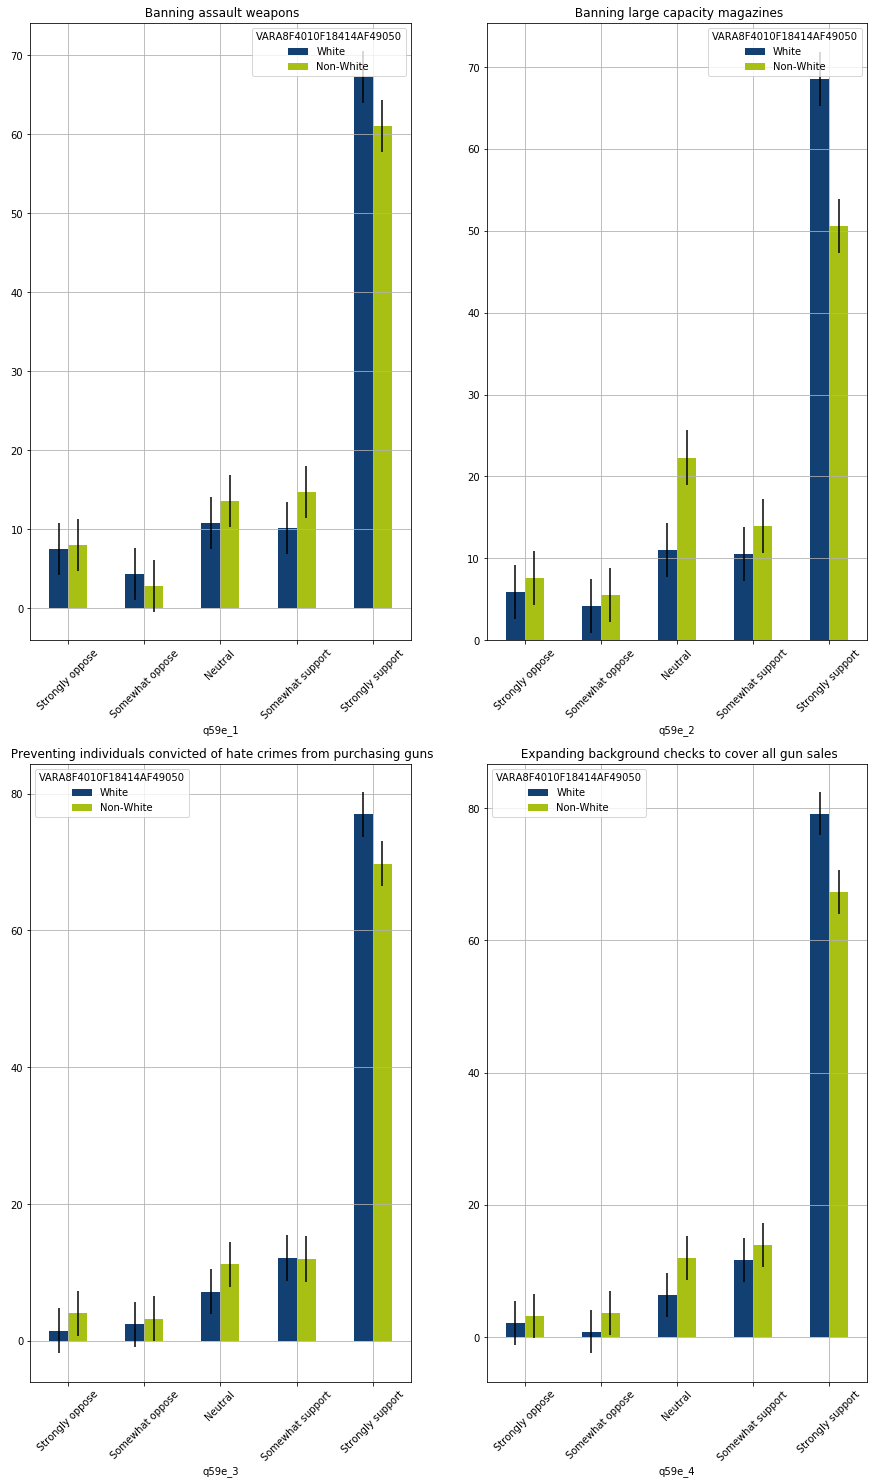

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,25))


make_subplot("q59e_1","VARA8F4010F18414AF49050", 0,0)
make_subplot("q59e_2","VARA8F4010F18414AF49050", 0,1)
make_subplot("q59e_3","VARA8F4010F18414AF49050", 1,0)
make_subplot("q59e_4","VARA8F4010F18414AF49050", 1,1)


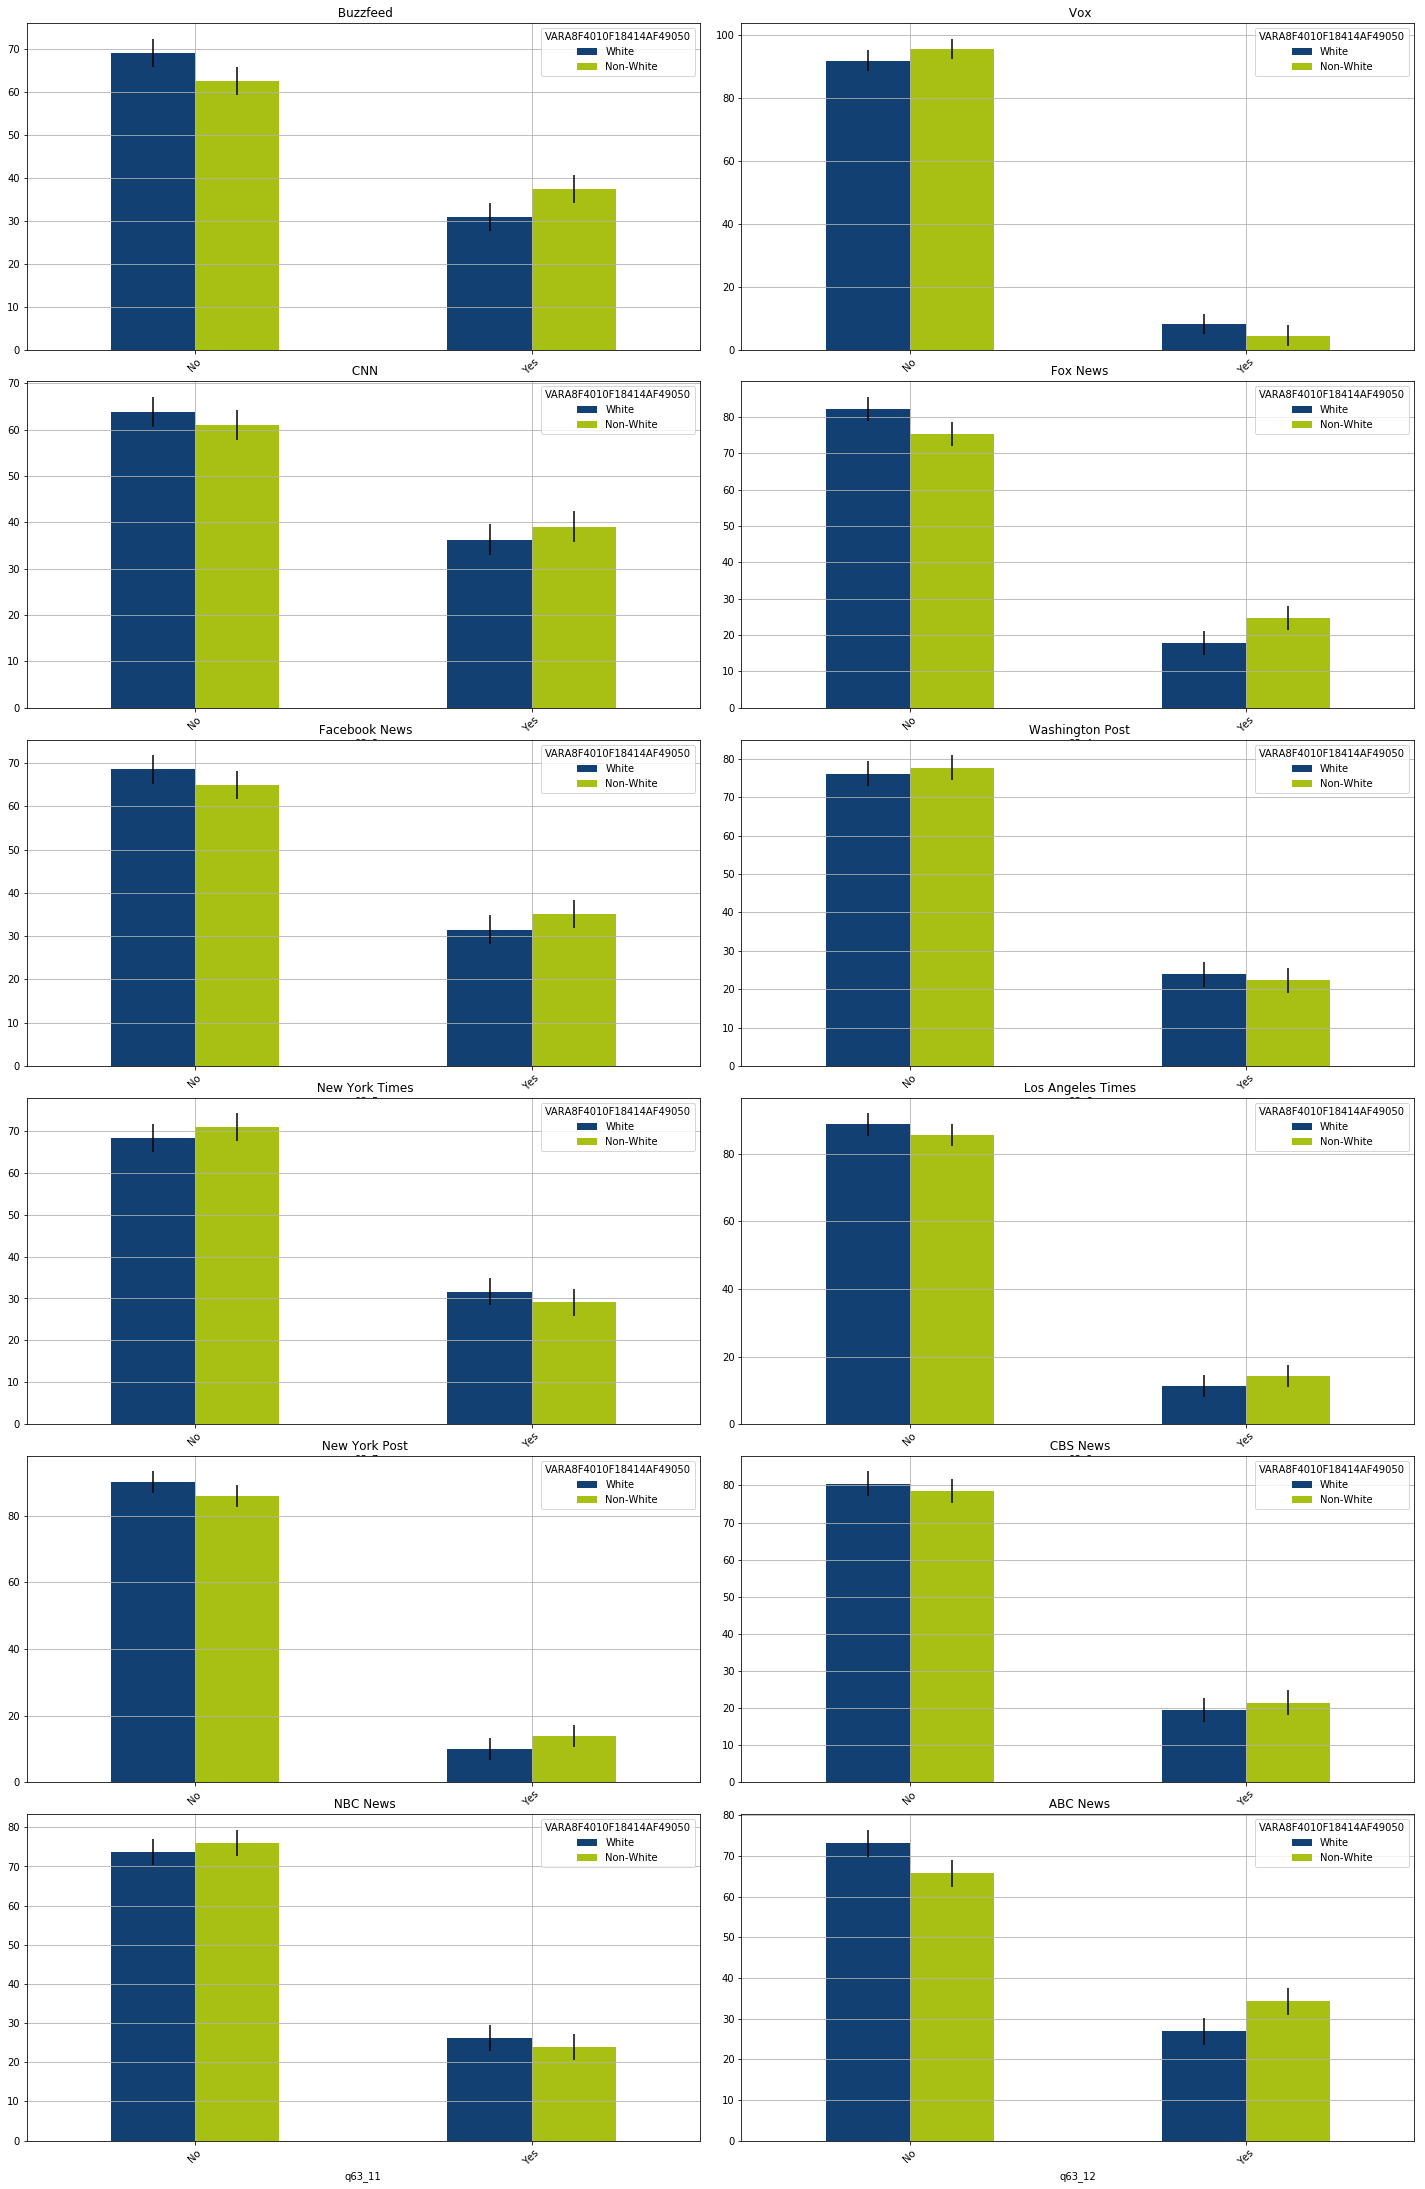

In [28]:
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(20,30))

fig.tight_layout() 
make_subplot("q63_1","VARA8F4010F18414AF49050", 0,0)
make_subplot("q63_2","VARA8F4010F18414AF49050", 0,1)
make_subplot("q63_3","VARA8F4010F18414AF49050", 1,0)
make_subplot("q63_4","VARA8F4010F18414AF49050", 1,1)
make_subplot("q63_5","VARA8F4010F18414AF49050", 2,0)
make_subplot("q63_6","VARA8F4010F18414AF49050", 2,1)
make_subplot("q63_7","VARA8F4010F18414AF49050", 3,0)
make_subplot("q63_8","VARA8F4010F18414AF49050", 3,1)
make_subplot("q63_9","VARA8F4010F18414AF49050", 4,0)
make_subplot("q63_10","VARA8F4010F18414AF49050", 4,1)
make_subplot("q63_11","VARA8F4010F18414AF49050", 5,0)
make_subplot("q63_12","VARA8F4010F18414AF49050", 5,1)

fig.savefig("media_habits.png")

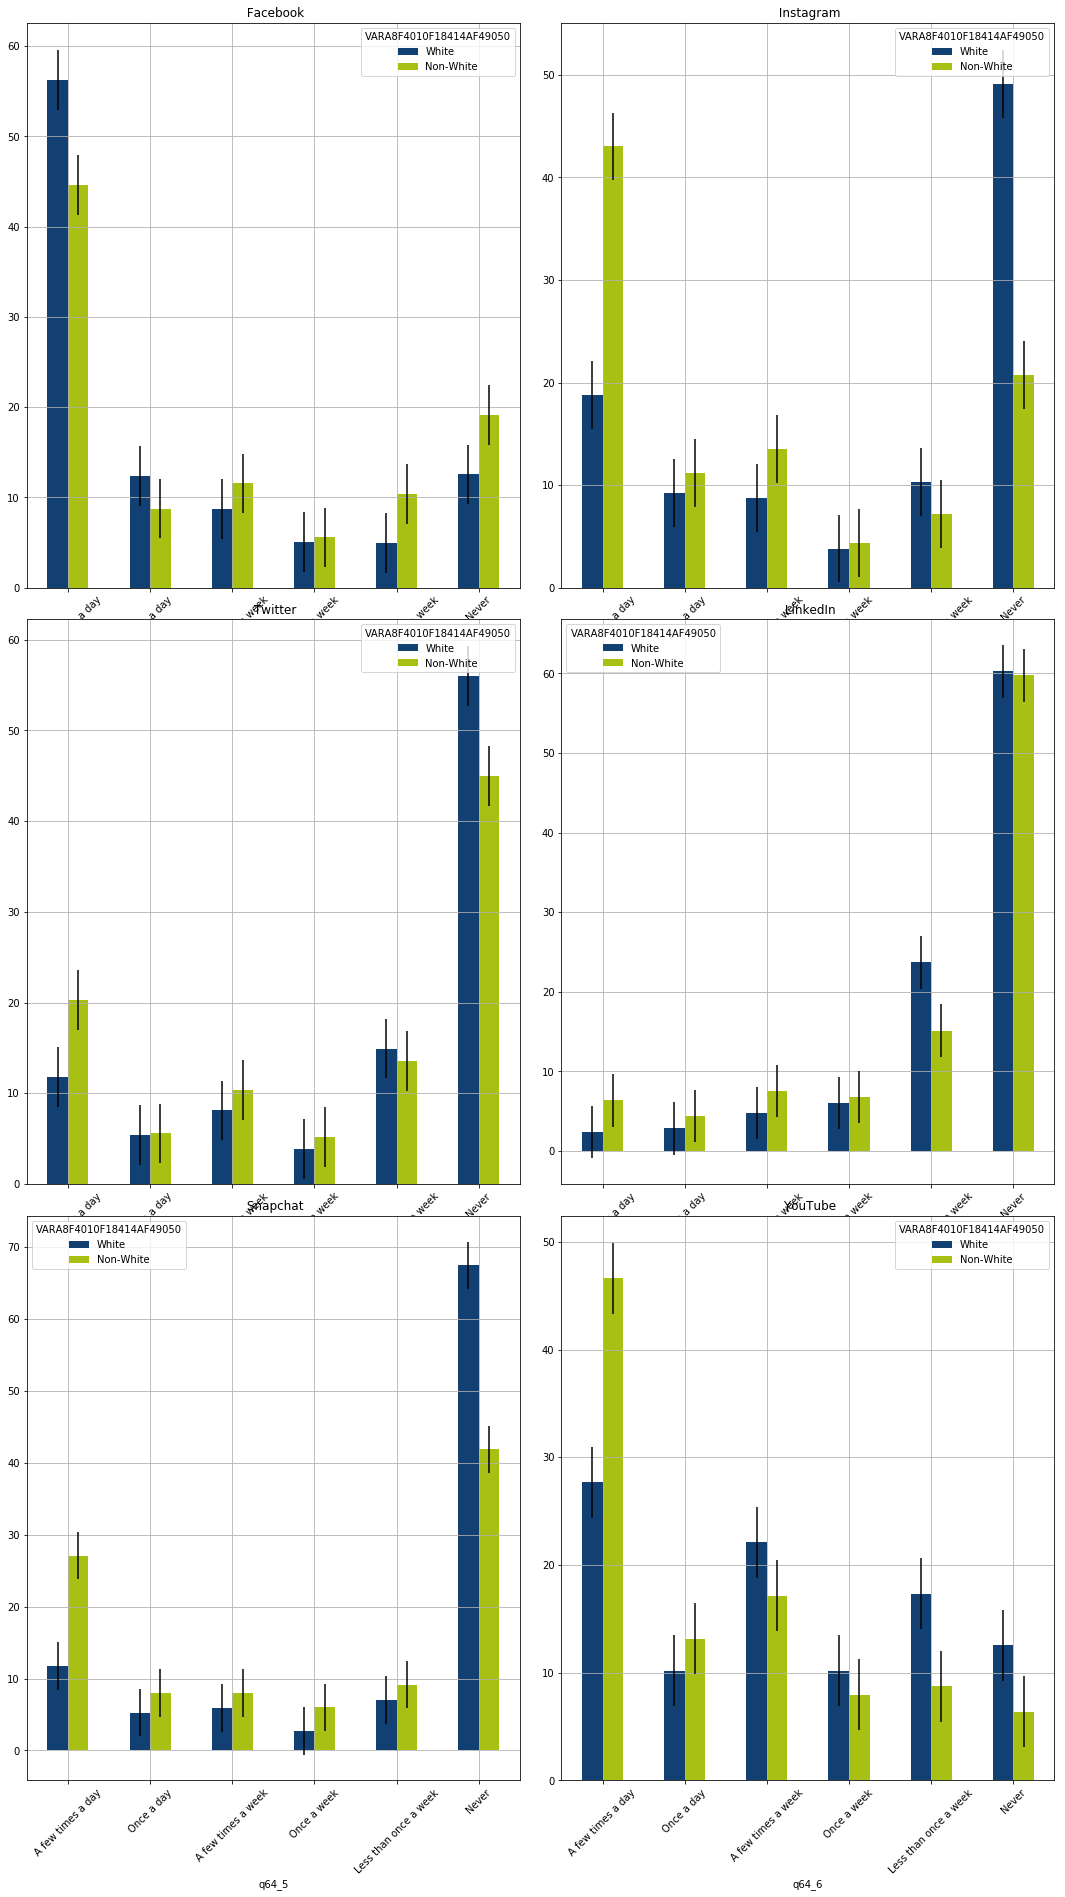

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,25))
fig.tight_layout() 


make_subplot("q64_1","VARA8F4010F18414AF49050", 0,0)
make_subplot("q64_2","VARA8F4010F18414AF49050", 0,1)
make_subplot("q64_3","VARA8F4010F18414AF49050", 1,0)
make_subplot("q64_4","VARA8F4010F18414AF49050", 1,1)
make_subplot("q64_5","VARA8F4010F18414AF49050", 2,0)
make_subplot("q64_6","VARA8F4010F18414AF49050", 2,1)
fig.savefig("social_media.png")

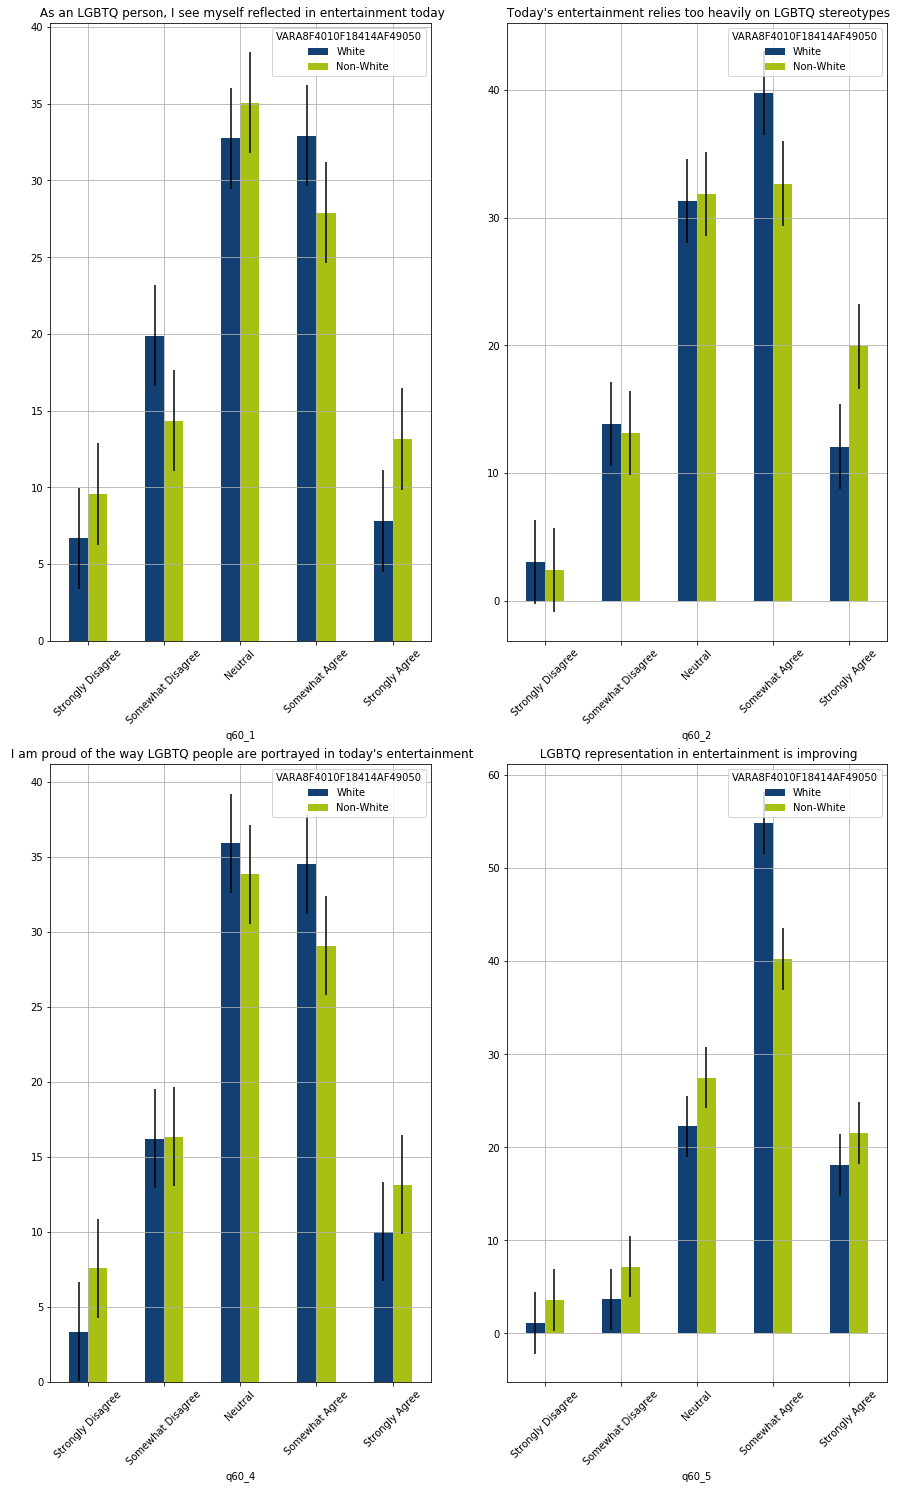

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,25))


make_subplot("q60_1","VARA8F4010F18414AF49050", 0,0)
make_subplot("q60_2","VARA8F4010F18414AF49050", 0,1)
make_subplot("q60_4","VARA8F4010F18414AF49050", 1,0)
make_subplot("q60_5","VARA8F4010F18414AF49050", 1,1)
fig.savefig("representation.png")

In [31]:

def make_plot(question1, question2):
    plot_df = two_questions(question1, question2)
    plot_df = clean_df(plot_df)
    array_position = meta.column_names.index(question1)
    title = meta.column_labels[array_position]
    #title = re.sub(r'.*-', '', title)
    fig = plot_df.set_index(question1).plot.bar(grid=True, rot = 45,
                                title = title,
                                figsize=(17,10),
                                yerr = margin_of_error).get_figure()
    return(fig)

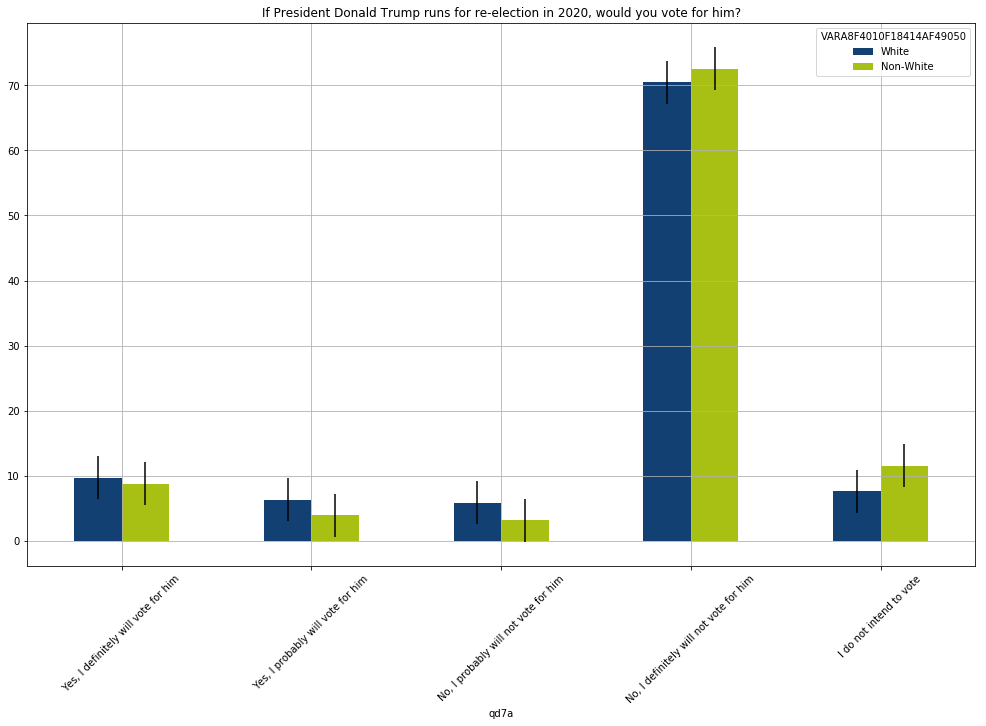

In [32]:
fig = make_plot("qd7a","VARA8F4010F18414AF49050")
fig.savefig("vote_trump.png")

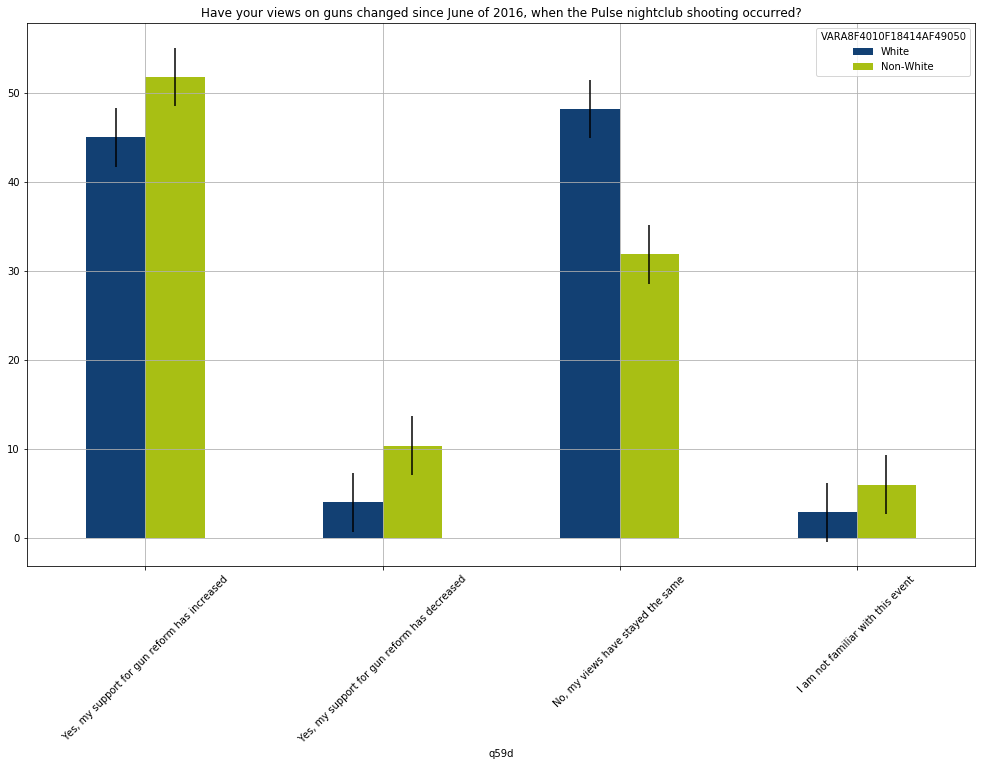

In [33]:
fig = make_plot("q59d","VARA8F4010F18414AF49050")
fig.savefig("pulse.png")

## Okay time to get seri